# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [23]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [25]:
df.shape

(414, 8)

### What are the features available in the dataset?

In [26]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [27]:
df.isnull()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


### Group all the features as dependent features in X

In [28]:
tv = 'Y house price of unit area'
df.drop(columns=[tv])

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [29]:
df[tv]

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [30]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=[tv])
y = df[[tv]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Choose the model (Linear Regression)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Create an Estimator object

In [34]:
estimator = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)

### Train the model

In [35]:
estimator.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [36]:
estimator.predict(X_test)

array([[34.59222454],
       [47.58673483],
       [20.9226481 ],
       [12.49402832],
       [43.11887361],
       [34.53739706],
       [30.94528506],
       [45.32577595],
       [38.04839075],
       [13.90217198],
       [11.89791644],
       [38.52611287],
       [31.88063097],
       [45.37604685],
       [50.84658168],
       [36.2862735 ],
       [44.41072387],
       [45.22203001],
       [30.05273304],
       [43.75888331],
       [51.29456053],
       [28.42367787],
       [40.02214039],
       [46.83612492],
       [45.84974629],
       [27.92864195],
       [31.22197429],
       [47.76028543],
       [46.28854703],
       [15.07952064],
       [33.75569025],
       [34.83403033],
       [42.32056056],
       [44.63278564],
       [48.22580741],
       [12.97087505],
       [41.19586968],
       [41.23713034],
       [38.99845431],
       [13.34108478],
       [39.17706813],
       [24.42380144],
       [54.59173411],
       [36.60841823],
       [34.90462826],
       [38

### Display the coefficients

In [37]:
estimator.coef_

array([[-1.09659640e-03,  5.69815368e+00, -2.49757004e-01,
        -4.94908683e-03,  1.07369954e+00,  2.26802763e+02,
        -3.62816002e+01]])

### Find how well the trained model did with testing data

In [39]:
y_pred = estimator.predict(X_test)
r2_score(y_test, y_pred)

0.7061990777417497

### Plot House Age Vs Price
#### Hint: Use regplot in sns

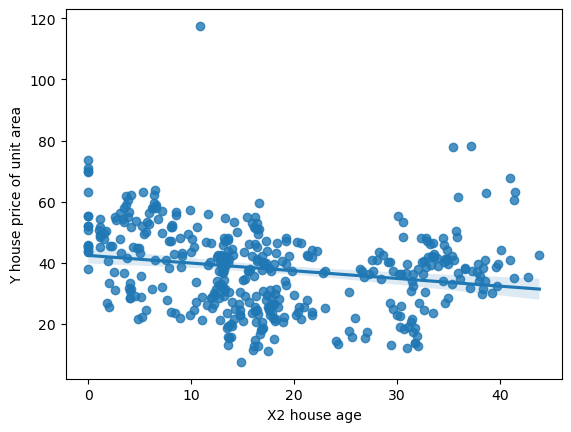

In [40]:
X = df['X2 house age']
y = df['Y house price of unit area']

sns.regplot(x=X, y=y, data=df)
plt.show()

### Plot Distance to MRT station Vs Price

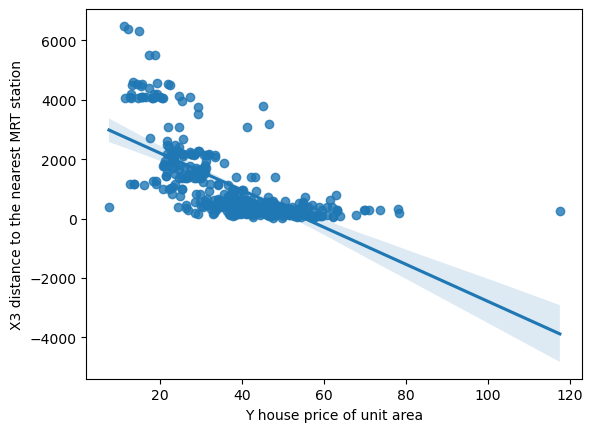

In [42]:
X = df['Y house price of unit area']
y = df['X3 distance to the nearest MRT station']

sns.regplot(x=X, y=y, data=df)
plt.show()

### Plot Number of Convienience Stores Vs Price

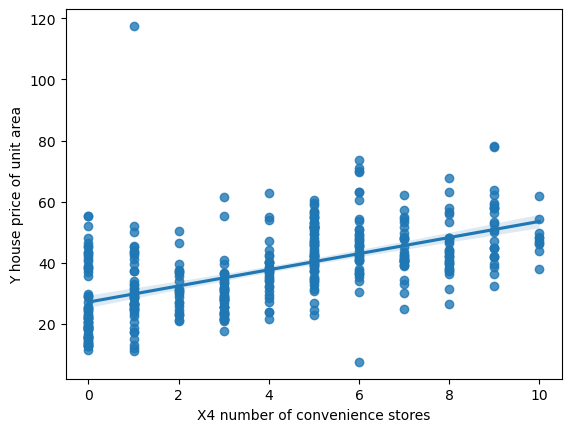

In [43]:
X = df['X4 number of convenience stores']
y = df['Y house price of unit area']


sns.regplot(x=X, y=y, data=df)
plt.show()